<a href="https://colab.research.google.com/github/VieiraEduardo/Classifica-o-de-Pontua-o-de-Cr-dito/blob/main/Modelo_de_Classifica%C3%A7%C3%A3o_de_Pontua%C3%A7%C3%A3o_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de caso de Classificação de Pontuação de crédito

Impotando as bibliotecas necessárias para a análise dos dados  e Importação do conjunto de dados de treinamento (train.csv)

In [ ]:
!pip install plotly

In [1]:
#importação da " dupla dinâmica ": Pandas e Numpy
import pandas as pd
import numpy as np

#importação das bibliotecas gráficas
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns

#Definicão de um template de fundo branco para plotagem de gráficos
pio.templates.default = "plotly_white"

#importação dos pacotes para criação do modelo
#importação da função train test_test_split do pacote sklearn
from sklearn.model_selection import train_test_split
#importação da função RandomForestClassifier do pacote sklearn
from sklearn.ensemble import RandomForestClassifier
#importação da função accuracy_score do pacote sklearn
from sklearn.metrics import accuracy_score

In [2]:
#importação do dataset
df = pd.read_csv('/content/train.csv')

#Exibição das primeiras linhas do dataset
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


# Explorando os dados

In [3]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3428 non-null   int64  
 1   Customer_ID               3428 non-null   int64  
 2   Month                     3428 non-null   int64  
 3   Name                      3428 non-null   object 
 4   Age                       3428 non-null   float64
 5   SSN                       3428 non-null   float64
 6   Occupation                3428 non-null   object 
 7   Annual_Income             3428 non-null   float64
 8   Monthly_Inhand_Salary     3428 non-null   float64
 9   Num_Bank_Accounts         3428 non-null   float64
 10  Num_Credit_Card           3428 non-null   float64
 11  Interest_Rate             3428 non-null   float64
 12  Num_of_Loan               3428 non-null   float64
 13  Type_of_Loan              3428 non-null   object 
 14  Delay_fr

# Verificando se existem valores nulos no dataset

Averificação de valores nulos éum dos primeiros passos de análise dos dados. Nste passo verificamos  a integridade  dos dados e se existem muitos registros e colunas sem informações.

In [4]:
print(df.isnull().sum())

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                1
dtype: int64


# Verificação do balanceamento das informações com relação a coluna objetivo: Credit Score


In [5]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    1811
Poor         961
Good         655
Name: count, dtype: int64

Como pode ser observado, a distribuição corresponde ao que geralmente acontece nas instituições financeiras. Um grande número de clientes é classificado como padrão. Um número menor classificado com Good e Poor.


# Conhecendo as relações que existem no dataset

O conjunto de dados tem muitos recursos  que podem treinar um modelo de aprendizado de máquina oara classificação de pontuação  de crédito. Vamos explorar todos os recursos um por um

In [6]:
fig = px.box(df,
              x = "Occupation",
              color = "Credit_Score",
              title = "Score de Crédito baseado por ocupação",
              color_discrete_map = {"Poor":"Red",
                                    "Standard":"Yellow",
                                    "Good":"Green"})
fig.show()

Não há muita diferença diferença nas pontuações de crédito de todas as ocupações mencionadas nos dados.


Próximo passo é explorar se a renda anual da pessoa impacta na sua pontuação de crédito ou não:


In [7]:
fig = px.box(df,
              x = "Credit_Score",
              y = "Annual_Income",
              color = "Credit_Score",
              title = "Score de Crédito baseado na renda anual",
              color_discrete_map = {"Poor":"Red",
                                    "Standard":"Yellow",
                                    "Good":"Green"})
fig.update_traces(quartilemethod="exclusive")
fig.show()

De acordo com a visualização acima, quando mais você ganha anualmente, melhor é a sua pontuação de crédio.


Agora, irei explorar se o salário mensal liquído ( in- Hand) afeta as pontuações de crédito ou não.


In [8]:
fig = px.box(df,
              x = "Credit_Score",
              y = "Monthly_Inhand_Salary",
              color = "Credit_Score",
              title = "Score de Crédito baseado no salário mensal",
              color_discrete_map = {"Poor":"Red",
                                    "Standard":"Yellow",
                                    "Good":"Green"})
fig.update_traces(quartilemethod="exclusive")
fig.show()

Assim como a renda anual, quanto mais o salário mensal você ganhar, melhor será sua pontual de crédito.


Agora, iremos ver se ter mais um contabancária impacta na pontuação de crédito ou não.


In [9]:
fig = px.box(df,
              x = "Credit_Score",
              y = "Num_Bank_Accounts",
              color = "Credit_Score",
              title = "Score de Crédito baseado no número de contas bancárias",
              color_discrete_map = {"Poor":"Red",
                                    "Standard":"Yellow",
                                    "Good":"Green"})
fig.update_traces(quartilemethod="exclusive")
fig.show()

De acordo com a visualização acima, é identificado que não é indicado ter mais de 5 contas  pois isso prejudica a ponuação de crédito. Umas pessoa deve ter de 2 a 3 contas bancárias somente.


Agora, iremos vero impacto da pontuação de crédito com base na quantidade de cartões de crédito que uma pessoa possui:


In [10]:
fig = px.box(df,
              x = "Credit_Score",
              y = "Num_Credit_Card",
              color = "Credit_Score",
              title = "Score de Crédito baseado na quantidade de cartões de crédito",
              color_discrete_map = {"Poor":"Red",
                                    "Standard":"Yellow",
                                    "Good":"Green"})
fig.update_traces(quartilemethod="exclusive")
fig.show()

Assim como o número de contas bancárias , ter mais cartões de crédito não afetará positivamente sua pontuação de crédito. ter de 3 a 5 cartões de crédito pe bom para sua pontuação de crédito.

Agora vamos ver o impacto nas pontuações de crédito com base em quanto uma pessoa paga em juros médios em empréstimos e EMIS ( total de prestação mensal de cada pessoa )



In [11]:
fig = px.box(df,
              x = "Credit_Score",
              y = "Interest_Rate",
              color = "Credit_Score",
              title = "Score de Crédito baseado na taxa de juros médios",
              color_discrete_map = {"Poor":"Red",
                                    "Standard":"Yellow",
                                    "Good":"Green"})
fig.update_traces(quartilemethod="exclusive")
fig.show()

Se a taxa de média de juros for de 4% a 11%, a pontuação de crédito é boa. Ter uma taxa média de mais de 15% é ruim para sua ponuação de crédito.


Agora, iremos ver quantos empréstimos uma pessoa pode tomar por vez para uma boa pontuação de crédito

In [12]:
fig = px.box(df,
              x = "Credit_Score",
              y = "Num_of_Loan",
              color = "Credit_Score",
              title = "Score de Crédito Baseado na Quantidade de Empréstimos tomado por Pessoa",
              color_discrete_map = {"Poor":"Red",
                                    "Standard":"Yellow",
                                    "Good":"Green"})
fig.update_traces(quartilemethod="exclusive")
fig.show()

Para ter uma boa pontuação de crédito você não deve fazer mais de 1 a 3 empréstimos por vez. Ter mais de três empréstimos por vez afetará negativamente sua pontuação de crédito.

Agora vamos ver se atrasar o pagamento na data de vencimento afeta a pontuação de crédito ou não.

In [13]:
fig = px.box(df,
              x = "Credit_Score",
              y = "Delay_from_due_date",
              color = "Credit_Score",
              title = "Score de Crédito baseado na quantidade de dias em atrasos no pagamento do cartão de crédito",
              color_discrete_map = {"Poor":"Red",
                                    "Standard":"Yellow",
                                    "Good":"Green"})
fig.update_traces(quartilemethod="exclusive")
fig.show()

De acordo com a anáise da imagem acima, é identificado que pode ocorrer um atraso de 5 a 14 dias após a data de vencimento, onde realizar o pagamento por mais de 17 dias em atraso apartir da data de vencimento, afetaria a pontuação de crédito do cliente.

A seguir, iremos olhar se os atrasados frequentes nos pagamentos afetarão as pontuações de crédito ou não.

In [14]:
fig = px.box(df,
              x = "Credit_Score",
              y = "Num_of_Delayed_Payment",
              color = "Credit_Score",
              title = "Score de Crédito baseado no número de pagamentos atrasados",
              color_discrete_map = {"Poor":"Red",
                                    "Standard":"Yellow",
                                    "Good":"Green"})
fig.update_traces(quartilemethod="exclusive")
fig.show()

Portanto, atrasar de 4 a 12 pagamentos a partir da data de vencimento, não afetará sua pontuação de crédito. Mas atrasar mais de  12 pagamentos a partir da data de vencimento afetará negativamente a pontuação de crédito.

Agra iremos ver se mais dívidas afetará a pontuação de crédito ou não:

In [15]:
fig = px.box(df,
              x = "Credit_Score",
              y = "Outstanding_Debt",
              color = "Credit_Score",
              title = "Score de Crédito baseado em débitos pendentes",
              color_discrete_map = {"Poor":"Red",
                                    "Standard":"Yellow",
                                    "Good":"Green"})
fig.update_traces(quartilemethod="exclusive")
fig.show()

Uma dívida de 380-1550 não afetará sua pontuação de crédito. mas sempre ter uma dívida de mais de 1338 afetará negativamente sua análise de crédito.

Agora, vamos ver se ter um alto  índice de utilização de crédito afetará as pontuações de crédito ou não.

In [16]:
fig = px.box(df,
              x = "Credit_Score",
              y = "Credit_Utilization_Ratio",
              color = "Credit_Score",
              title = "Score de Crédito baseado no índice de utiização de crédito",
              color_discrete_map = {"Poor":"Red",
                                    "Standard":"Yellow",
                                    "Good":"Green"})
fig.update_traces(quartilemethod="exclusive")
fig.show()

Taxa de utilização de crédito significa sua dívida total dividida pelo créito total disponível. De acordo com a figura acima, sua taxa de utilização de crédito não afeta sua pontuação de crédito.


Agora, vamos ver como a idade do histórico de crédtito afeta sua pontuação de crédito.

In [17]:
fig = px.box(df,
              x = "Credit_Score",
              y = "Credit_History_Age",
              color = "Credit_Score",
              title = "Score de Crédito baseado na idade do histórico de crédito",
              color_discrete_map = {"Poor":"Red",
                                    "Standard":"Yellow",
                                    "Good":"Green"})
fig.update_traces(quartilemethod="exclusive")
fig.show()

Portanto ter um longo histórico de crédito resulta em melhores pontuações de crédito.

Agora, vamos ver se ter um valor baixo no final do mês afeta a pontuação de crédito ou não.

In [18]:
fig = px.box(df,
              x = "Credit_Score",
              y = "Monthly_Balance",
              color = "Credit_Score",
              title = "Score de Crédito baseado no valor restante no final do mês",
              color_discrete_map = {"Poor":"Red",
                                    "Standard":"Yellow",
                                    "Good":"Green"})
fig.update_traces(quartilemethod="exclusive")
fig.show()

Portanto, ter um saldo mensal alto em sua conta no final do mês é bom para uma pontuação de crédito. Um saldo inferior a U$D 250 é ruim para a pontuação de crédito.

# Mapa de correlação

In [19]:
# Fazendo uma cópia dos dados
dados = df.copy()

In [20]:
# Adequação dos dados para mostrar o mapa de correlação
numeric_columns = dados.select_dtypes(include=['float64', 'int64'])

# Calcular a correlação de Spearman
spearman_corr = numeric_columns.corr(method='spearman')
print(spearman_corr)

                                ID  Customer_ID     Month       Age       SSN  \
ID                        1.000000     0.025441  0.000551  0.014620 -0.049223   
Customer_ID               0.025441     1.000000  0.000420  0.020128 -0.003832   
Month                     0.000551     0.000420  1.000000  0.017162  0.001252   
Age                       0.014620     0.020128  0.017162  1.000000  0.006875   
SSN                      -0.049223    -0.003832  0.001252  0.006875  1.000000   
Annual_Income            -0.040503    -0.017670  0.000692 -0.072018 -0.056400   
Monthly_Inhand_Salary    -0.039346    -0.027798 -0.000885 -0.065149 -0.051499   
Num_Bank_Accounts        -0.000550     0.004246  0.000471 -0.142475  0.040756   
Num_Credit_Card           0.003316    -0.001299 -0.001456 -0.062268  0.033585   
Interest_Rate            -0.006255     0.041641 -0.000923 -0.177432  0.071741   
Num_of_Loan               0.013407     0.064446  0.000120 -0.183587  0.083542   
Delay_from_due_date       0.

In [21]:
plt.figure(figsize=(21,21))


<Figure size 2100x2100 with 0 Axes>

<Figure size 2100x2100 with 0 Axes>

<Axes: >

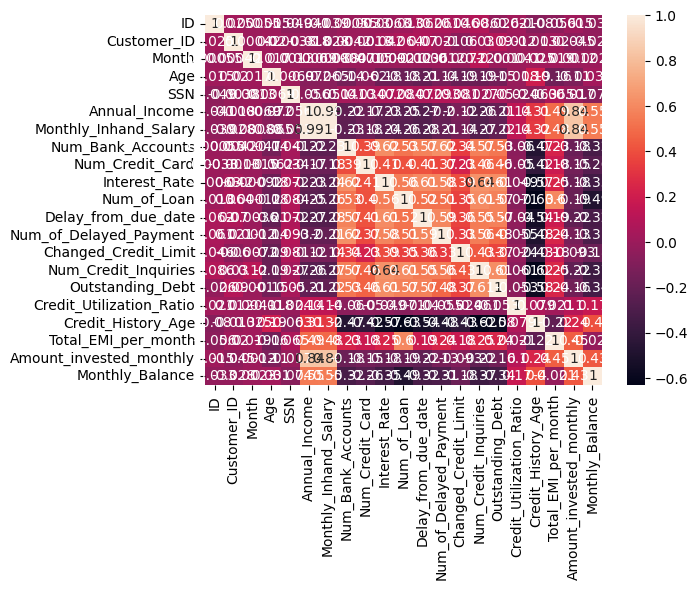

In [22]:
sns.heatmap(spearman_corr, annot=True)

# Modelo de Classificação de Pontuação de Crédito

Depois de analisar mais um recurso importante  ( mix de crédito )  no conjunto de dados é valioso para determinar pontuações de crédito.O recurso mix de crédito informa sobre os tipos de crédito e empréstimos que você tomou.

Como a coluna Credit_Mix é categórica, vou transformá-la em um recuroso numérico para que seja possível usar para treinar um modelo de Machine Learning para a tarefa de classificação de pontuação de crédito:

# Transformação de dados

In [23]:
# Transformação de uma coluna categórica em numérica
dados["Credit_Mix"] = dados["Credit_Mix"].map({"Standard":1,
                                                "Good":2,
                                                "Bad":0})

Agora vou dividar os dados em recursos e rótulos selecionando os recursos que considero importante para a construção do modelo.

In [24]:
x = np.array(dados[["Annual_Income", "Monthly_Inhand_Salary",
                 "Num_Bank_Accounts", "Num_Credit_Card",
                "Interest_Rate", "Num_of_Loan",
                "Delay_from_due_date", "Num_of_Delayed_Payment",
                "Credit_Mix", "Outstanding_Debt",
                "Credit_History_Age", "Monthly_Balance"]])
y = np.array(dados[["Credit_Score"]])

Agora irei dividir os dados em conjunto de treinamento e teste, e continuar treinando um modelo de classificação de pontuação de crédito:


In [25]:
#Dividindo a base em treinamento e teste. teste ocupará 33% da base ( aleatoriamente )
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                    test_size=0.33,
                                                    random_state=42)

In [26]:
#Instancionando o classificador do RandomForest no objeto model
model = RandomForestClassifier()

In [27]:
#Realizando a classificação, passando como parâmetro a base de treinamento x e y
model.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()

In [ ]:
#Fazer a previsão usando o modelo nos dados do teste
ypred = model.predict(xtest)

#Calcular a acuracia comparando as previsõescom os valores reais
accuracy = accuracy_score(ytest, ypred)*100

print(f"Acurácia do modelo:, {accuracy:5.2f},%")

In [ ]:
print("Credit Score Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
i = input("Credit Mix (Bad: 0, Standard: 1, Good: 3) : ")
j = float(input("Outstanding Debt: "))
k = float(input("Credit History Age: "))
l = float(input("Monthly Balance: "))

features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l]])
print("Predicted Credit Score = ", model.predict(features))

Credit Score Prediction : 
Annual Income: 70000
Monthly Inhand Salary: 12000
Number of Bank Accounts: 3
Number of Credit cards: 2
Interest rate: 2
Number of Loans: 1
Average number of days delayed by the person: 5
Number of delayed payments: 3
Credit Mix (Bad: 0, Standard: 1, Good: 3) : 1
Outstanding Debt: 600
Credit History Age: 5
Monthly Balance: 1000
Predicted Credit Score =  ['Standard']
